# Project: Investigate a Dataset for Movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The Selected the TMDb movie data will be investigated here. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 

As mentioned, The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time , so assuming that columns budget & revenue  are also in dollars.

Example Questions that will be answered here are:
        1. Which genres are most popular from year to year? 
        2. What kinds of properties are associated with movies that have high revenues?
        3. Which year had highest number of movies?
        4. Which movie has highest, lowest profit?
        5. Which movie has highest,lowest revenue?
        6. Which movie has highest budget?
        7. Movie with Highest And Lowest Votes?
        8. Runtime of movies year by year
        

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling

> Here we will load in the data, check for cleanliness, and then trim and clean dataset ie keeping only relevent data and deleting the unused data for analysis. 

### General Properties

In [2]:
# load the dataset
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# more info about data types of columns, missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
# to see shape ie rows,cols in the dataset
df.shape

(10866, 21)

In [11]:
# count of duplicates in data set, if any 
sum(df.duplicated())

1

In [12]:
# see what all movies had zero budget if any
df.query('budget == 0')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00
88,301875,tt3289728,1.959765,0,2000000,Equals,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,http://equals-the-movie.com/,Drake Doremus,Find your equal.,...,A futuristic love story set in a world where e...,101,Drama|Romance|Science Fiction,Scott Free Productions|Infinite Frameworks Stu...,9/4/15,135,5.6,2015,0.0,1.839999e+06
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.0,0.000000e+00
95,258509,tt2974918,1.841779,0,233755553,Alvin and the Chipmunks: The Road Chip,Jason Lee|Justin Long|Bella Thorne|Matthew Gra...,http://www.foxmovies.com/movies/alvin-and-the-...,Walt Becker,Fast & furry-ous,...,"Through a series of misunderstandings, Alvin, ...",92,Adventure|Animation|Comedy|Family,Regency Enterprises|Fox 2000 Pictures|Sunswept...,12/17/15,278,5.7,2015,0.0,2.150550e+08
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.0,0.000000e+00
101,254302,tt0462335,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,NaN,Ben Wheatley,Leave the real world behind,...,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015,0.0,0.000000e+00


In [15]:
# see what all movies had zero revenue
df.query('revenue == 0')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
93,307663,tt3480796,1.872696,10000000,0,Vice,Ambyr Childers|Thomas Jane|Bryan Greenberg|Bru...,NaN,Brian A Miller,Where the future is your past.,...,Julian Michaels has designed the ultimate reso...,96,Thriller|Science Fiction|Action|Adventure,Grindstone Entertainment Group|K5 Internationa...,1/16/15,181,4.1,2015,9.199996e+06,0.0
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.000000e+00,0.0
101,254302,tt0462335,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,NaN,Ben Wheatley,Leave the real world behind,...,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015,0.000000e+00,0.0
103,292040,tt3321300,1.646664,0,0,Spooks: The Greater Good,Peter Firth|Kit Harington|Jennifer Ehle|Lara P...,http://www.shinepictures.co.uk/films/9/spooks-...,Bharat Nalluri,NaN,...,During a handover to the head of counter-terro...,104,Thriller|Action,BBC Films|Isle of Man Film|Shine Pictures|Kudo...,4/11/15,114,5.6,2015,0.000000e+00,0.0
116,297291,tt3086386,1.380320,0,0,The Scorpion King: The Lost Throne,Victor Webster|Ellen Hollman|Barry Bostwick|Wi...,NaN,Mike Elliott,Action Adventure,...,"When he is betrayed by a trusted friend, Matha...",105,Action|Fantasy|Adventure,Universal Pictures,1/9/15,22,4.5,2015,0.000000e+00,0.0


### Data Cleaning 
1. Columns not required for investigation will be dropped.
2. Check for duplicates and getting remove those
3. Drop null values

In [16]:
# dropping few not required columns
df.drop(['homepage','tagline','keywords','overview'], axis = 1, inplace = True)


In [17]:
# we saw there was 1 duplicate, removing it
df.drop_duplicates(inplace=True)

In [18]:
# verify if the duplicate ws removed
sum(df.duplicated())

0

In [19]:
# verify if not required coulmns are dropped or not
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 17 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(4), int64(6), object(7)
memory usage: 1.5+ MB


In [20]:
# check for nulls
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [22]:
# remove nulls
df.dropna(inplace=True)
# verfiy if nulls are removed
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [23]:
# cast column has multiple values separated by pipe (|) characters, lets seperate main character & add a new colmun for it
df['main_cast'] = df.cast.apply(lambda x: x.split('|')[0])
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,main_cast
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Vin Diesel


In [24]:
# save the new data
df.to_csv('clean_tmdb-movies.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 : Which genres are most popular from year to year?
   

In [32]:
# load the cleaned data
import pandas as pd
df = pd.read_csv('clean_tmdb-movies.csv')


In [33]:
# get the mean of popularity
popular_mean= df['popularity'].mean()
popular_mean

0.69477461596724654

In [34]:
# do a dataset with popularity more than the mean
pop_col = ['original_title', 'cast', 'genres', 'budget_adj', 'revenue_adj', 'runtime','release_year']
popular_df = df.query('popularity >= 0.69477461596724654')[pop_col]
popular_df.head()

,original_title,cast,genres,budget_adj,revenue_adj,runtime,release_year
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,1.379999e+08,1.392446e+09,124,2015
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller,1.379999e+08,3.481613e+08,120,2015
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Adventure|Science Fiction|Thriller,1.012000e+08,2.716190e+08,119,2015
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Action|Adventure|Science Fiction|Fantasy,1.839999e+08,1.902723e+09,136,2015
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Action|Crime|Thriller,1.747999e+08,1.385749e+09,137,2015


In [35]:
def calculate_count(column):
    # Convert column to string and seperate it by '|'
    data = popular_df[column].str.cat(sep = '|')
    
    # Storing the values seperately in a Pandas series
    data = pd.Series(data.split('|'))
    count = data.value_counts(ascending = False)
    
    return count

In [36]:
count = calculate_count('genres')

#top 5 values
count.head()

Drama        1125
Comedy        980
Thriller      885
Action        842
Adventure     630
dtype: int64

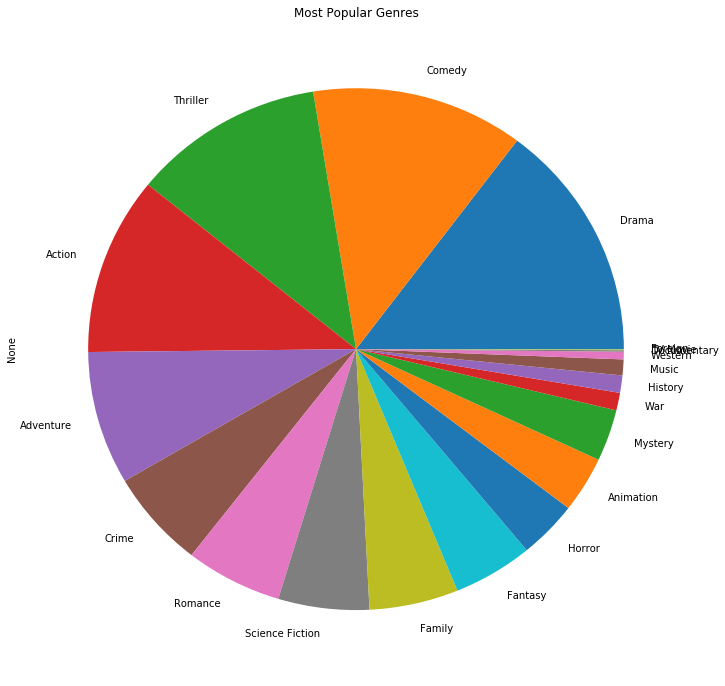

In [37]:
count.plot(kind='pie', figsize = (12, 12))
plt.title("Most Popular Genres");

The above chart shows that Most popular genre is Drama followed by Comedy, Thriller, Action & Adventureand so on.

Text(0,0.5,'Num of Movies')

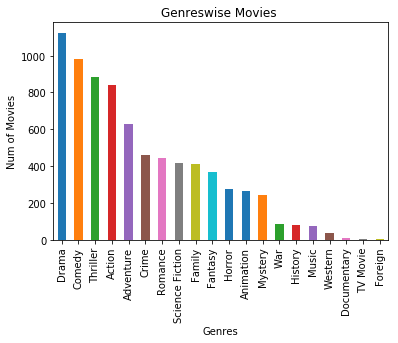

In [38]:
count.plot(x='genres',y='id',kind="bar")
plt.title('Genreswise Movies ')
plt.xlabel('Genres')
plt.ylabel('Num of Movies')

Tha above is another way of representaion to show the movies count vs the most popular genre in a Descending mode

### Research Question 2  :  What kinds of properties are associated with movies that have high revenues?

Text(0,0.5,'Popularity')

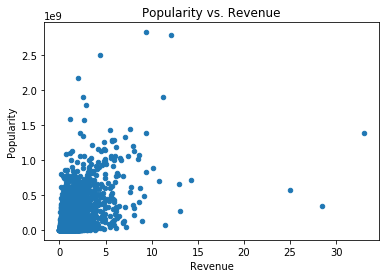

In [27]:
# Relationship of popularity and revenue

df.plot(x = 'popularity', y = 'revenue_adj', kind="scatter")
plt.title('Popularity vs. Revenue')
plt.xlabel('Revenue')
plt.ylabel('Popularity')


From the above chart we can observe that Popularity and revenue are positively correlated, which means high popularity associated with high revenue.

Text(0,0.5,'Runtime')

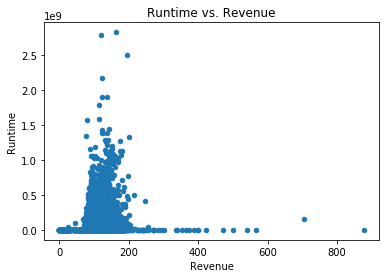

In [28]:
df.plot(x = 'runtime', y = 'revenue_adj', kind="scatter")
plt.title('Runtime vs. Revenue')
plt.xlabel('Revenue')
plt.ylabel('Runtime')

We can infer from the above chart that Runtime between 120 and 180 mins are most profitable ie more revenue, with a peak around 120 mins

Text(0,0.5,'Budget')

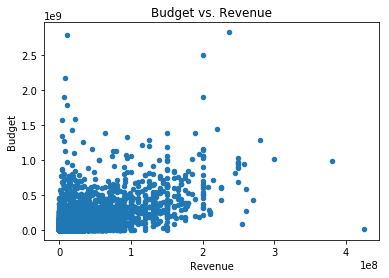

In [28]:
df.plot(x = 'budget', y = 'revenue_adj', kind="scatter")
plt.title('Budget vs. Revenue')
plt.xlabel('Revenue')
plt.ylabel('Budget')

### Research Question 3  :  Which year had highest number of movies?

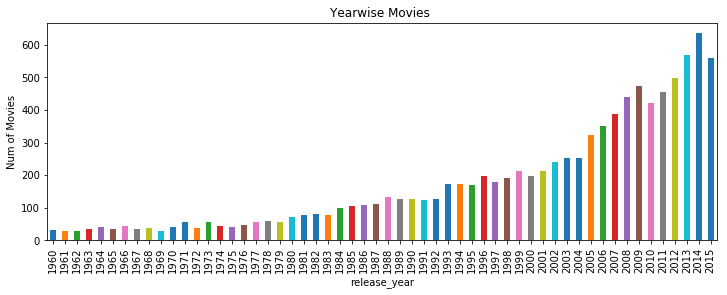

In [39]:
# Investigation of highest number of movies per year
data=df.groupby('release_year').count()['id']
data.tail()

data.plot(x = 'release_year', y = 'id', kind="line",figsize=(12, 4))
plt.title('Yearwise Movies ')
plt.xlabel('Year')
plt.ylabel('Num of Movies')
# or a bar chart can be used 
data.plot(x = 'release_year', y = 'id', kind="bar",figsize=(12, 4))

We can see, that, overall on an average , the number of movies per year is increasing , considering a decade gap.
& Year 2014 had highest number of movies

### Research Question 4  :  Which movie has highest, lowest profit?

In [4]:
#calculate Profit for each of the movie
#add a new column in the dataframe name 'Profit'
df['profit'] = df['revenue'] - df['budget']

In [18]:
#df.plot(x = 'original_title', y = 'profit', kind="bar",figsize=(20, 4))
#plt.title('Movies vs Profit')
#plt.xlabel('Movie')
#plt.ylabel('Profit')

# not ideal way -since many data is there , also taking much time , so calculating it
high_index = df['profit'].idxmax()
high = pd.DataFrame(df.loc[high_index,:])
low_index = df['profit'].idxmin()
low = pd.DataFrame(df.loc[low_index,:])
high, low

(                                                                   1248
 id                                                                19995
 imdb_id                                                       tt0499549
 popularity                                                      9.43277
 budget                                                        237000000
 revenue                                                      2781505847
 original_title                                                   Avatar
 cast                  Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
 director                                                  James Cameron
 runtime                                                             162
 genres                         Action|Adventure|Fantasy|Science Fiction
 production_companies  Ingenious Film Partners|Twentieth Century Fox ...
 release_date                                                   12/10/09
 vote_count                                        

In [23]:
# finding max & min can be a method to resuse
def find_maxmin(x):
    high_index = df[x].idxmax()
    high = pd.DataFrame(df.loc[high_index,:])
    low_index = df[x].idxmin()
    low = pd.DataFrame(df.loc[low_index,:])
    return high, low

### Research Question 5  :  Which movie has highest,lowest revenue?

In [24]:
# call method
find_maxmin('revenue')

(                                                                   1248
 id                                                                19995
 imdb_id                                                       tt0499549
 popularity                                                      9.43277
 budget                                                        237000000
 revenue                                                      2781505847
 original_title                                                   Avatar
 cast                  Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
 director                                                  James Cameron
 runtime                                                             162
 genres                         Action|Adventure|Fantasy|Science Fiction
 production_companies  Ingenious Film Partners|Twentieth Century Fox ...
 release_date                                                   12/10/09
 vote_count                                        

From the above two , we can observe that : Avatar movie has highest Profit & Revenue, director being James Cameron in the year 2009 &  The Warrior's Way movie has lowest Profit & Revenue , director being Sngmoo Lee in year 2010
So we can also infer from that is, movie which has more revenue , has more profit too


### Research Question 6  :  Which movie has highest budget?

In [22]:
# call method
find_maxmin('budget')

(                                                                   2030
 id                                                                46528
 imdb_id                                                       tt1032751
 popularity                                                      0.25054
 budget                                                        425000000
 revenue                                                        11087569
 original_title                                        The Warrior's Way
 cast                  Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
 director                                                     Sngmoo Lee
 runtime                                                             100
 genres                        Adventure|Fantasy|Action|Western|Thriller
 production_companies                           Boram Entertainment Inc.
 release_date                                                    12/2/10
 vote_count                                        

Observation is that : The Warrior's Way movie has highest budget , director being Sngmoo Lee & Wild card movie has lowest,director being Simon West

### Research Question 7  :  Movie with Highest And Lowest Votes?

In [25]:
# call method
find_maxmin('vote_average')

(                                                                   6121
 id                                                                24970
 imdb_id                                                       tt0110758
 popularity                                                      0.21201
 budget                                                                0
 revenue                                                               0
 original_title                                        Pink Floyd: Pulse
 cast                  David Gilmour|Nick Mason|Richard Wright|Sam Br...
 director                                                   David Mallet
 runtime                                                             145
 genres                                                            Music
 production_companies           SMV Enterprises|Columbia Music Video|EMI
 release_date                                                     7/9/06
 vote_count                                        

From the above output , we can see that : Highest votes for Movie- Pink Floyd: Pulse and lowest - Transmorphers

### Research Question 8  : Runtime of movies year by year

Text(0,0.5,'Runtime')

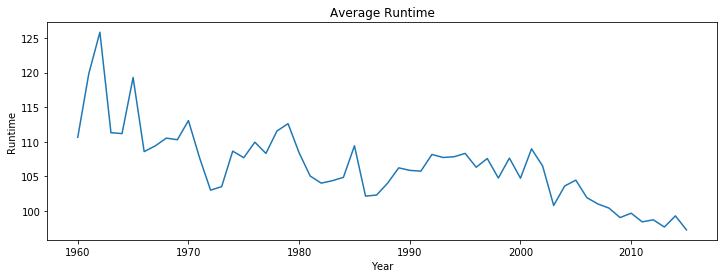

In [27]:
data=df.groupby('release_year').mean()['runtime']
data.tail()

data.plot(x = 'release_year', y = 'runtime', kind="line",figsize=(12, 4))
plt.title('Average Runtime')
plt.xlabel('Year')
plt.ylabel('Runtime')

According to the plot movie duration is decreasing year to year. Because at this time nobody want to watch the long duration movies because it is quite boring.(Opinion) That's why the average runtime duraion of the movies are around 100 Minutes.

<a id='conclusions'></a>
## Conclusions

Overall, for a movie to get success ie more profit , more votes we should have a budget of 200 - 300 million, a runtime of approx. 100- 120 minutes, and it should be in the genre of Drama, Comedy, Action, Thriller, or Adventure.

## Limitations
The dataset does not confirm that every release of every director is listed.
The revenue/bugdet where not informed what currencies it is, so if we make any calculation based on the amount , it might vary, but overall corelation remains same.
During data cleaning process , Dropping missing or Null values from variables of our interest might vary analysis and could show unintentional bias


In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0